### <font size=5  color=#003366> <b> MEMOIRE Pauline Hermans</b><br><br> 
<b>Trouver les outliers  (inspiré du notebook de Camille Dubois)</b></font> <br><br>
08 mai 2023
</font>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from path import perso_path_string
import warnings


('C:/Users/Pauline/Desktop/Memoire/Data/', 'C:/Users/Pauline/Desktop/Memoire/Data/Pauline_folder/Data/excel/', 'C:/Users/Pauline/Desktop/Memoire/Data/alcoholic_study/subjects/', 'C:/Users/Pauline/Desktop/Memoire/Data/Patients/', 'C:/Users/Pauline/Desktop/Memoire/Data/Pauline_folder/Analysis/', 'C:/Users/Pauline/Desktop/Memoire/Data/Atlas/', 'C:/Users/Pauline/Desktop/Memoire/Data/Pauline_folder/', 'C:/Users/Pauline/Desktop/Memoire/Data/Freesurfer/')


In [2]:
plt.rcParams["figure.figsize"] = (5,5)

perso_path, excel_path, subjects_path, patients_path, analysis_path, atlas_path, P_folder_path, Freesurfer_path = perso_path_string(on_cluster=False)

PATH_savefig = P_folder_path + "Data\Outliers\Patients"

<font size=6 color=#009999> <b>
    PARTIE 1 : POUR LES PATIENTS ALCOOLIQUES
    </b> </font> <br>

In [3]:
datas_p = pd.read_excel(excel_path + "data_alcoholic_patients_rename.xlsx",index_col=0 ).replace(["/", "perdu", "incomplet"], np.nan)

names = ["Numéro","T1_BDI","T1_Total_OCDS","T1_OCDS_Obsessions","T1_OCDS_Compulsions","T1_STAI","T1_MFI","T2_BDI","T2_Total_OCDS","T2_OCDS_Obsessions","T2_OCDS_Compulsions","T2_STAI","T2_MFI"]
df_behav = datas_p[names]
df_behav.head(5)

,Numéro,T1_BDI,T1_Total_OCDS,T1_OCDS_Obsessions,T1_OCDS_Compulsions,T1_STAI,T1_MFI,T2_BDI,T2_Total_OCDS,T2_OCDS_Obsessions,T2_OCDS_Compulsions,T2_STAI,T2_MFI
0,sub01,0.0,14.0,8.0,6.0,NaN,NaN,1.0,5.0,2.0,3.0,25.0,34.0
1,sub02,12.0,20.0,11.0,9.0,NaN,NaN,43.0,11.0,4.0,7.0,71.0,126.0
2,sub03,8.0,14.0,8.0,6.0,NaN,NaN,17.0,NaN,NaN,NaN,37.0,91.0
3,sub04,13.0,18.0,12.0,6.0,59.0,NaN,5.0,11.0,9.0,2.0,45.0,38.0
4,sub05,20.0,22.0,12.0,10.0,44.0,84.0,12.0,2.0,1.0,1.0,40.0,64.0


<font size=5 color=#009999> <b>
    1) Toutes les données avec les données manquantes
    </b> </font> <br>
<font size=3 color=#009999> <b>
    Visulisation de toutes les données avec les données manquantes fixées à -2. Elles apparaissent dans les régions grisées et ne seront pas utilisées pour les analyses impliquant le comportement pour lequel il manque une donnée. Cela signifie que le patient est tout de même conservé pour les analyses impliquant les autres comportements pour lesquels les données sont complètes.
    </b> </font> <br>

In [4]:
df_behav_nan_to_minus2 = df_behav.copy().replace(np.nan,-2)
df_behav_nan_to_minus2.head(10)

,Numéro,T1_BDI,T1_Total_OCDS,T1_OCDS_Obsessions,T1_OCDS_Compulsions,T1_STAI,T1_MFI,T2_BDI,T2_Total_OCDS,T2_OCDS_Obsessions,T2_OCDS_Compulsions,T2_STAI,T2_MFI
0,sub01,0.0,14.0,8.0,6.0,-2.0,-2.0,1.0,5.0,2.0,3.0,25.0,34.0
1,sub02,12.0,20.0,11.0,9.0,-2.0,-2.0,43.0,11.0,4.0,7.0,71.0,126.0
2,sub03,8.0,14.0,8.0,6.0,-2.0,-2.0,17.0,-2.0,-2.0,-2.0,37.0,91.0
3,sub04,13.0,18.0,12.0,6.0,59.0,-2.0,5.0,11.0,9.0,2.0,45.0,38.0
4,sub05,20.0,22.0,12.0,10.0,44.0,84.0,12.0,2.0,1.0,1.0,40.0,64.0
5,sub06,11.0,26.0,16.0,10.0,40.0,79.0,17.0,12.0,10.0,2.0,64.0,96.0
6,sub07,23.0,19.0,12.0,7.0,47.0,79.0,10.0,13.0,9.0,4.0,41.0,46.0
7,sub08,15.0,12.0,9.0,3.0,36.0,74.0,8.0,8.0,7.0,1.0,36.0,61.0
8,sub09,29.0,19.0,9.0,10.0,40.0,104.0,3.0,4.0,2.0,2.0,31.0,64.0
9,sub10,25.0,8.0,4.0,4.0,25.0,84.0,3.0,1.0,0.0,1.0,20.0,50.0


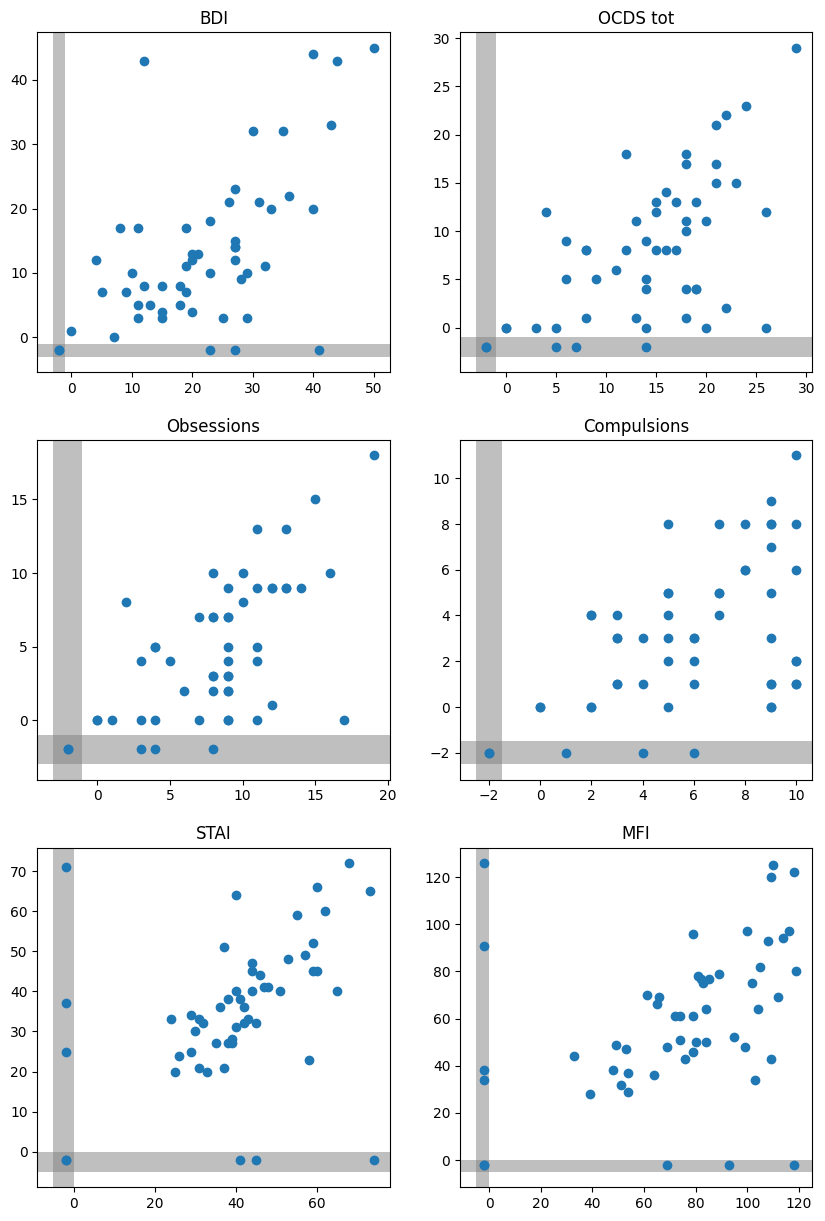

In [5]:
plt.figure(figsize=(10,15))
plt.subplot(321)
plt.axhspan(-3, -1, facecolor='gray', alpha = 0.5)
plt.axvspan(-3,-1, facecolor='gray', alpha = 0.5)
plt.scatter(df_behav_nan_to_minus2['T1_BDI'], df_behav_nan_to_minus2['T2_BDI'])
plt.title('BDI')
plt.subplot(322)
plt.axhspan(-3, -1, facecolor='gray', alpha = 0.5)
plt.axvspan(-3,-1, facecolor='gray', alpha = 0.5)
plt.scatter(df_behav_nan_to_minus2['T1_Total_OCDS'], df_behav_nan_to_minus2['T2_Total_OCDS'])
plt.title('OCDS tot')
plt.subplot(323)
plt.axhspan(-3, -1, facecolor='gray', alpha = 0.5)
plt.axvspan(-3,-1, facecolor='gray', alpha = 0.5)
plt.scatter(df_behav_nan_to_minus2['T1_OCDS_Obsessions'], df_behav_nan_to_minus2['T2_OCDS_Obsessions'])
plt.title('Obsessions')
plt.subplot(324)
plt.axhspan(-2.5, -1.5, facecolor='gray', alpha = 0.5)
plt.axvspan(-2.5,-1.5, facecolor='gray', alpha = 0.5)
plt.scatter(df_behav_nan_to_minus2['T1_OCDS_Compulsions'], df_behav_nan_to_minus2['T2_OCDS_Compulsions'])
plt.title('Compulsions')
plt.subplot(325)
plt.axhspan(-5, 0, facecolor='gray', alpha = 0.5)
plt.axvspan(-5, 0, facecolor='gray', alpha = 0.5)
plt.scatter(df_behav_nan_to_minus2['T1_STAI'], df_behav_nan_to_minus2['T2_STAI'])
plt.title('STAI')
plt.subplot(326)
plt.axhspan(-5, 0, facecolor='gray', alpha = 0.5)
plt.axvspan(-5, 0, facecolor='gray', alpha = 0.5)
plt.scatter(df_behav_nan_to_minus2['T1_MFI'], df_behav_nan_to_minus2['T2_MFI'])
plt.title('MFI')
plt.show()

<font size=5 color=#009999> <b>
    2) Suppression des outliers
    </b> </font> <br>

<font size=3 color=#009999> <b>
    Les données restantes sont analysées comportements par comportement pour vérifier la présence d'outliers. On regarde l'évolution des comportements et on supprime ceux pour lesquels les évolutions sont outliers. On ne regarde pas les temps de manière individuelle (voir anexe A).
    </b> </font> <br>

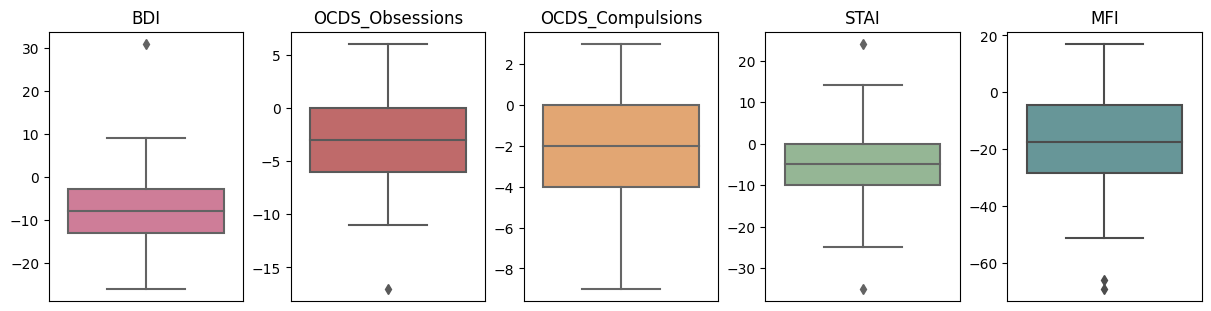

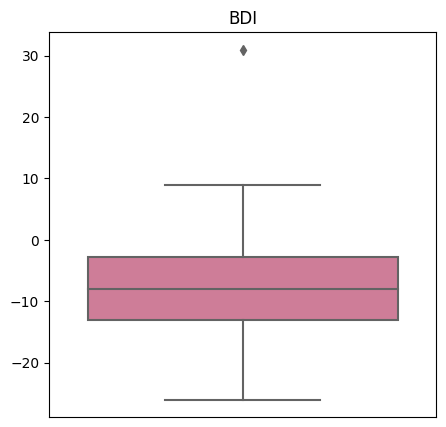

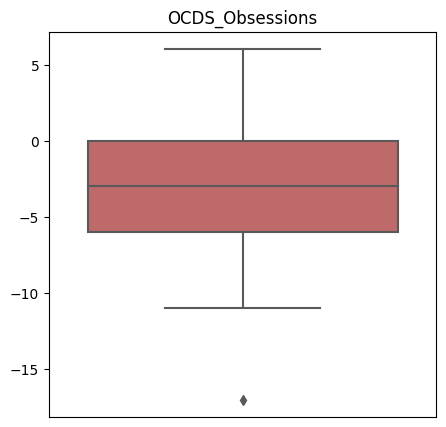

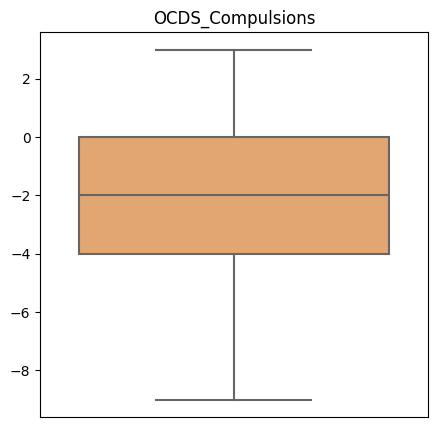

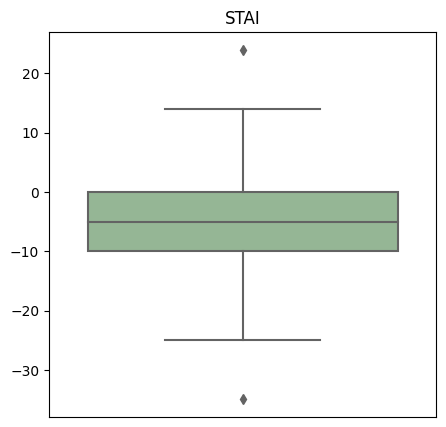

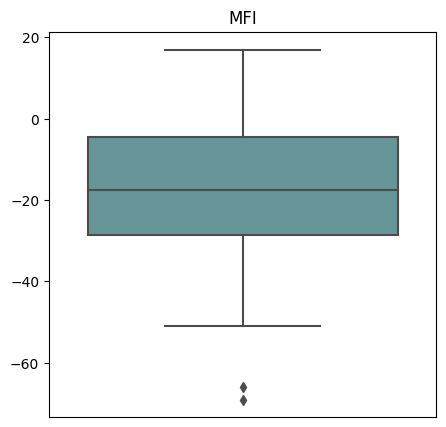

In [34]:
warnings.filterwarnings('ignore')

comportement =  ["BDI","OCDS_Obsessions","OCDS_Compulsions","STAI","MFI"]
colors = [ "palevioletred","indianred","sandybrown","darkseagreen","cadetblue"]
#"BDI", "OCDS_MODIFIE_Total","OCDS_Obsessions","OCDS_Compulsions",
fig = plt.figure(figsize=(12,3),constrained_layout = True)
#plt.tight_layout(h_pad=6)
value = 151
for i in range(len(comportement)) :
    c= comportement[i]
    color = colors[i]
    df_behav['diff_'+c] = (df_behav["T2_"+c] - df_behav["T1_"+c]).dropna(axis=0)
    df_behav['diff_'+c].head(5)
    
    plt.subplot(value)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    sns.boxplot(data=np.asarray(df_behav['diff_'+c]), orient="v", color=color).set(title=c)
    #plt.savefig(PATH_savefig + "\Boxplot_" + c + "_evolution.png")
    value = value +1
#fig.suptitle('Boxplot of ')
plt.savefig(PATH_savefig + "\Boxplot_comportement_outliers.png")
plt.show()

for i in range(len(comportement)) :
    c= comportement[i]
    color = colors[i]
    df_behav['diff_'+c] = (df_behav["T2_"+c] - df_behav["T1_"+c]).dropna(axis=0)
    df_behav['diff_'+c].head(5)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    sns.boxplot(data=np.asarray(df_behav['diff_'+c]), orient="v", color=color).set(title=c)
    plt.savefig(PATH_savefig + "\Boxplot_"+c+"t_outliers.png")
    plt.show()

In [17]:

print("Outliers to drop between T2 and T1")
print("----------------------------------------------------------------------")

print("BDI : " + str(np.where(df_behav['diff_BDI']>20)[0]))
print( df_behav.loc[df_behav['diff_BDI']>20,"Numéro"])

print("----------------------------------------------------------------------")

#print("OCDS Tot : " +str(np.where(df_behav['diff_Total_OCDS']<-20)[0]))
#print(df_behav.loc[df_behav['diff_Total_OCDS']<-20,"Numéro"])
#print("----------------------------------------------------------------------")

print("Obsessions : " +str(np.where(df_behav['diff_OCDS_Obsessions']<-15)[0]))
print(df_behav.loc[df_behav['diff_OCDS_Obsessions']<-15,"Numéro"])
print("----------------------------------------------------------------------")

print("Compuslion : Keep all")
print("----------------------------------------------------------------------")

print("STAI : " +str(np.where(df_behav['diff_STAI']<-30)[0]) + str(np.where(df_behav['diff_STAI']>20)[0]))
print(df_behav.loc[df_behav['diff_STAI']<-30,"Numéro"])
print(df_behav.loc[df_behav['diff_STAI']>20,"Numéro"])
print("----------------------------------------------------------------------")

print("MFI : " + str(np.where(df_behav['diff_MFI']<-60)[0]))
print(df_behav.loc[df_behav['diff_MFI']<-60,"Numéro"])
      


Outliers to drop between T2 and T1
----------------------------------------------------------------------
BDI : [1]
1    sub02
Name: Numéro, dtype: object
----------------------------------------------------------------------
Obsessions : [20]
20    sub21
Name: Numéro, dtype: object
----------------------------------------------------------------------
Compuslion : Keep all
----------------------------------------------------------------------
STAI : [20][5]
20    sub21
Name: Numéro, dtype: object
5    sub06
Name: Numéro, dtype: object
----------------------------------------------------------------------
MFI : [24 33]
24    sub25
33    sub34
Name: Numéro, dtype: object


<font size=3 color=#009999> <b>
    On crée un dictionnaire pour rassembler les outliers. Il sera utilisé dans les analyses pour supprimer les données outliers.
    </b> </font> <br>

In [18]:
outliers = {"BDI" : ["sub02"],
           "Total_OCDS" : ["sub21"],
           "OCDS_Obsessions" : ["sub21"],
           "OCDS_Compulsions" : [],
           "STAI" : ["sub21","sub06"],
           "MFI" : ["sub25","sub34"]}
print(outliers)
np.save(P_folder_path + "Data\Outliers\outliers_patients_comportment.npy", outliers) 

{'BDI': ['sub02'], 'Total_OCDS': ['sub21'], 'OCDS_Obsessions': ['sub21'], 'OCDS_Compulsions': [], 'STAI': ['sub21', 'sub06'], 'MFI': ['sub25', 'sub34']}


<font size=5 color=#009999> <b>
    3) Visualisation des données et de leur répartition avant et après cleaning
    </b> </font> <br>
<font size=3 color=#009999> <b>
    Les évolutions rouges représentent les outliers qui ont été supprimés.
    </b> </font> <br>

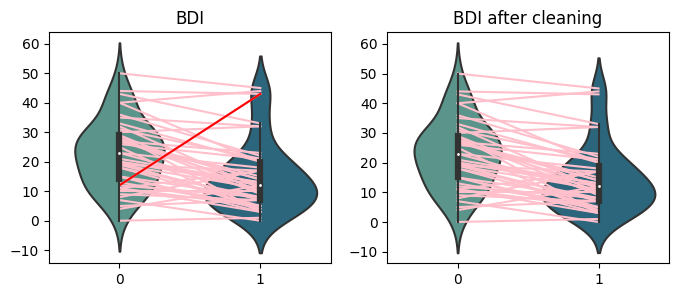

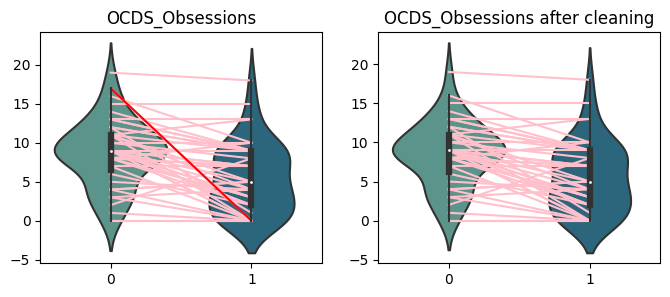

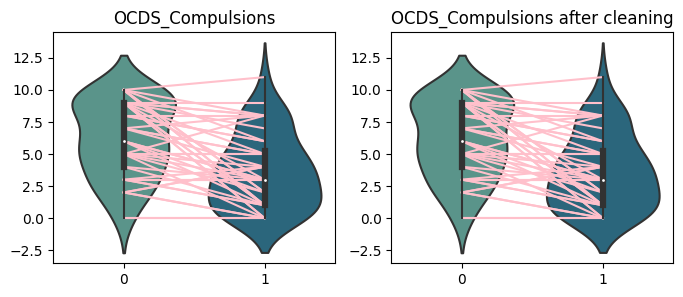

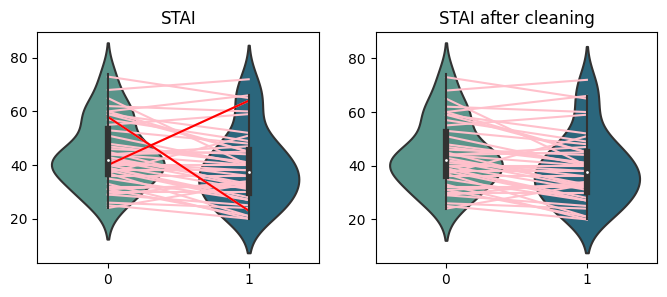

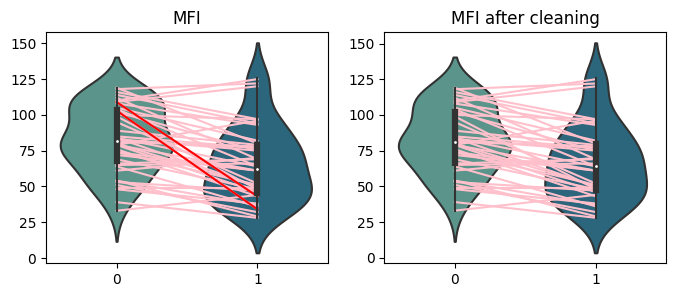

In [19]:
warnings.filterwarnings('ignore')
comportement =  ["BDI","OCDS_Obsessions","OCDS_Compulsions","STAI","MFI"]
#"BDI", "OCDS_MODIFIE_Total","OCDS_Obsessions","OCDS_Compulsions",

for c in comportement :
    df_c = df_behav[["Numéro","T1_"+c,"T2_"+c,"diff_"+c]]
    for sub in outliers[c]:
        df_c = df_c.drop(df_c[df_c["Numéro"]==sub].index)
    df_c.head(35)
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    for i in df_behav.index:
        plt.plot([0,1], [df_behav["T1_"+c][i], df_behav["T2_"+c][i]], color='pink')
    for sub in outliers[c]:
        ind = df_behav[df_behav["Numéro"]==sub].index
        plt.plot([0,1], [df_behav["T1_"+c][ind], df_behav["T2_"+c][ind]], color='r')
    sns.violinplot(data = [df_behav["T1_"+c], df_behav["T2_"+c]], palette="crest").set(title=c)
    
    plt.subplot(122)
    for i in df_c.index:
        plt.plot([0,1], [df_c["T1_"+c][i], df_c["T2_"+c][i]], color='pink')
    sns.violinplot(data = [df_c["T1_"+c], df_c["T2_"+c]], palette="crest").set(title=c+ ' after cleaning')

    plt.savefig(PATH_savefig + "\Violinplot_" + c + "_cleaning.png")
    plt.show()  

<font size=6 color=#009999> <b>
    PARTIE 2 : POUR LES CONTROLES
    </b> </font> <br>

In [21]:
datas_c = pd.read_excel(excel_path + "data_alcoholic_controls_rename.xlsx",index_col=0 ).replace(["/", "perdu", "incomplet"], np.nan)

names = ["Numéro","T1_BDI","T1_Total_OCDS","T1_OCDS_Obsessions","T1_OCDS_Compulsions","T1_STAI","T1_MFI"]
df_behav_controls = datas_c[names]
df_behav_controls.head(5)

,Numéro,T1_BDI,T1_Total_OCDS,T1_OCDS_Obsessions,T1_OCDS_Compulsions,T1_STAI,T1_MFI
0,sub54,16.0,0.0,0.0,0.0,54.0,62.0
1,sub55,5.0,0.0,0.0,0.0,24.0,41.0
2,sub56,7.0,0.0,0.0,0.0,21.0,49.0
3,sub57,NaN,NaN,NaN,NaN,NaN,NaN
4,sub58,7.0,0.0,0.0,0.0,23.0,45.0


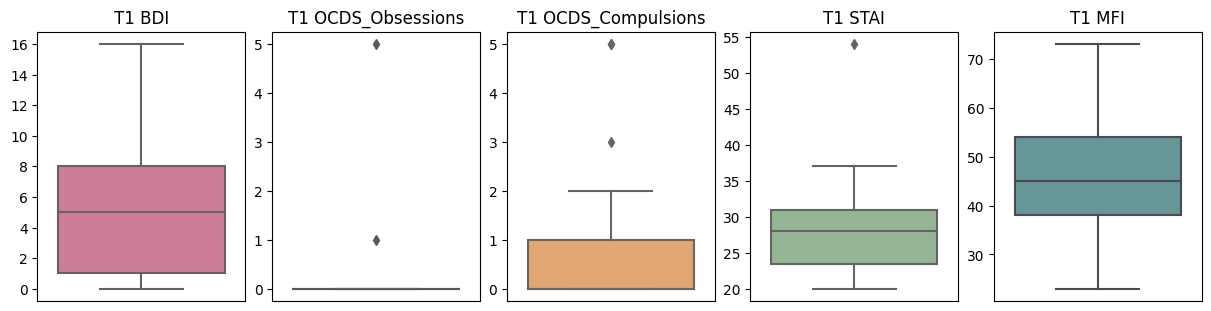

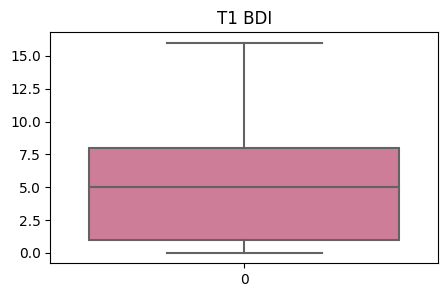

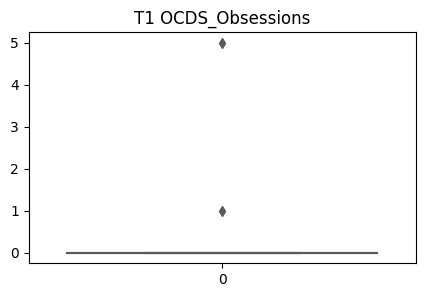

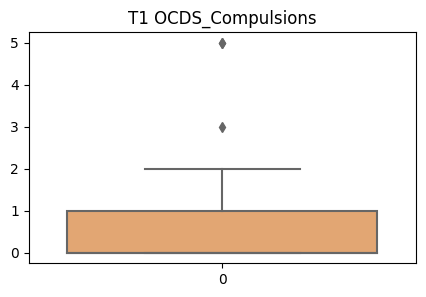

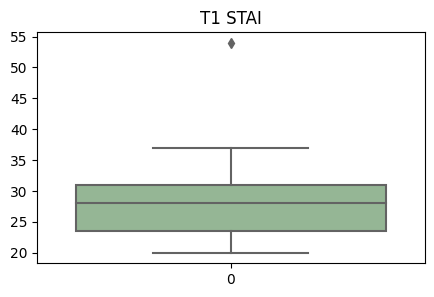

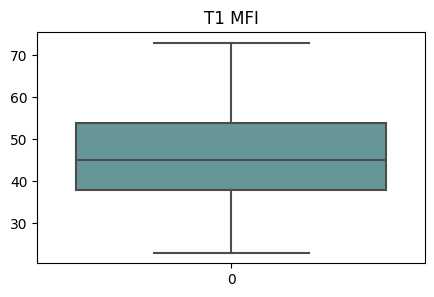

In [32]:
warnings.filterwarnings('ignore')
comportement =  ["BDI","OCDS_Obsessions","OCDS_Compulsions","STAI","MFI"]
colors = [ "palevioletred","indianred","sandybrown","darkseagreen","cadetblue"]
PATH_savefig = P_folder_path + "Data\Outliers\Controls"

fig = plt.figure(figsize=(12,3),constrained_layout = True)
#plt.tight_layout(h_pad=6)
value = 151
for i in range(len(comportement)) :
    c= comportement[i]
    color = colors[i]

    
    plt.subplot(value)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    sns.boxplot(data=np.asarray(df_behav_controls["T1_"+c]), orient="v", color=color).set(title="T1 "+c)
    #plt.savefig(PATH_savefig + "\Boxplot_" + c + "_evolution.png")
    value = value +1
#fig.suptitle('Boxplot of ')
plt.savefig(PATH_savefig + "\Boxplot_comportement_outliers_Controls.png")
plt.show()


for i in range(len(comportement)) :
    c= comportement[i]
    color = colors[i]
    #df_behav[c] = df_behav[c].dropna(axis=0)
    df_behav_controls["T1_"+c].head(5)
    
    plt.figure(figsize=(5,3))
    plt.subplot(111)
    sns.boxplot(data=np.asarray(df_behav_controls["T1_"+c]), orient="v",color=color).set(title="T1 "+c)
    plt.show()

In [24]:

print("Outliers to drop between T2 and T1")
print("----------------------------------------------------------------------")

print("BDI : Keep all")


print("----------------------------------------------------------------------")

#print("OCDS Tot : " +str(np.where(df_behav_controls["OCDS_total"]>3)[0]))
#print(df_behav_controls.loc[df_behav_controls["OCDS_total"]>3,"Numéro"])
#print("----------------------------------------------------------------------")

print("Obsessions : " +str(np.where(df_behav_controls['T1_OCDS_Obsessions']>0.5)[0]))
print(df_behav_controls.loc[df_behav_controls['T1_OCDS_Obsessions']>0.5,"Numéro"])
print("----------------------------------------------------------------------")

print("Compuslion : " +str(np.where(df_behav_controls['T1_OCDS_Compulsions']>2)[0]))
print(df_behav_controls.loc[df_behav_controls['T1_OCDS_Compulsions']>2,"Numéro"])
print("----------------------------------------------------------------------")

print("STAI : " +str(np.where(df_behav_controls['T1_STAI']>50)[0]))
print(df_behav_controls.loc[df_behav_controls['T1_STAI']>50,"Numéro"])
print("----------------------------------------------------------------------")

print("MFI : Keep all")
  

Outliers to drop between T2 and T1
----------------------------------------------------------------------
BDI : Keep all
----------------------------------------------------------------------
Obsessions : [ 8 15]
8     sub62
15    sub69
Name: Numéro, dtype: object
----------------------------------------------------------------------
Compuslion : [ 8 15 16]
8     sub62
15    sub69
16    sub70
Name: Numéro, dtype: object
----------------------------------------------------------------------
STAI : [0]
0    sub54
Name: Numéro, dtype: object
----------------------------------------------------------------------
MFI : Keep all


In [25]:
outliers_controls = {"BDI" : [],
           "Total_OCDS" : ["sub62","sub69","sub70"],
           "OCDS_Obsessions" : ["sub62","sub69"],
           "OCDS_Compulsions" : ["sub62","sub69","sub70"],
           "STAI" : ["sub54"],
           "MFI" : []}
print(outliers_controls)
np.save(P_folder_path + "Data\Outliers\outliers_controls_comportment.npy", outliers_controls) 

{'BDI': [], 'Total_OCDS': ['sub62', 'sub69', 'sub70'], 'OCDS_Obsessions': ['sub62', 'sub69'], 'OCDS_Compulsions': ['sub62', 'sub69', 'sub70'], 'STAI': ['sub54'], 'MFI': []}


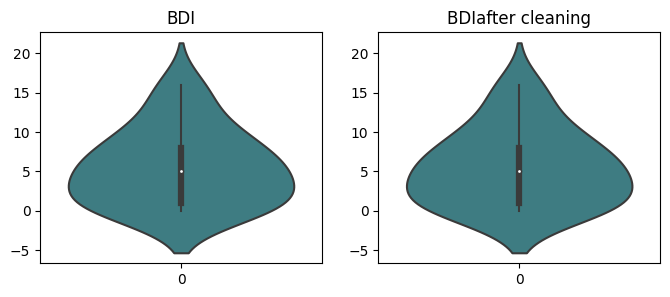

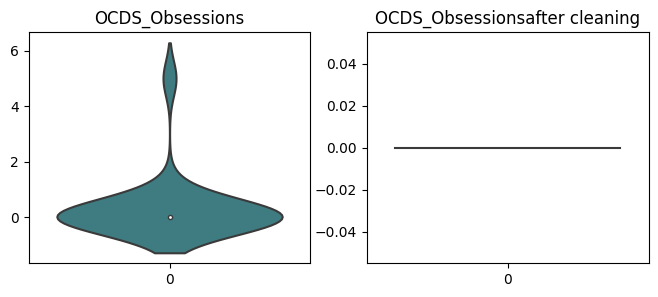

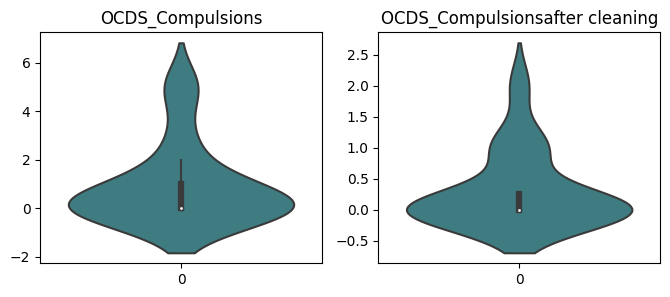

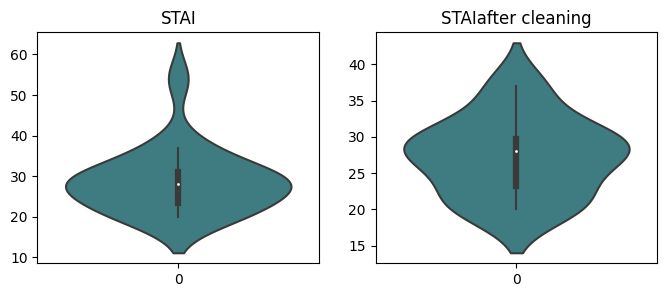

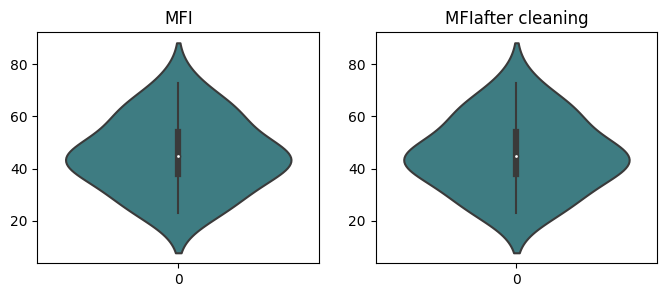

In [26]:
warnings.filterwarnings('ignore')
comportement =  ["BDI","OCDS_Obsessions","OCDS_Compulsions","STAI","MFI"]
#"BDI", "OCDS_MODIFIE_Total","OCDS_Obsessions","OCDS_Compulsions",
for c in comportement :
    df_c = df_behav_controls[["Numéro","T1_"+c]]
    for sub in outliers_controls[c]:
        df_c = df_c.drop(df_c[df_c["Numéro"]==sub].index)
    df_c.head(35)
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    sns.violinplot(data = [df_behav_controls["T1_"+c]], palette="crest").set(title=c)
    
    plt.subplot(122)
    sns.violinplot(data = [df_c["T1_"+c]], palette="crest").set(title=c+ 'after cleaning')


    plt.show()  

<font size=5 color=#009999> <b>
    Annexe A : Comparaison temps unique
    </b> </font> <br>
<font size=3 color=#009999> <b>
    On peut regarder les outliers pour chaque comportement à chaque temps de manière individuelle mais comme on utilise que l'évolution dans nos analyses c'est pas très utile d'enlever ces outliers-là.
    </b> </font> <br>
    


In [27]:
df_behav.head(5)

,Numéro,T1_BDI,T1_Total_OCDS,T1_OCDS_Obsessions,T1_OCDS_Compulsions,T1_STAI,T1_MFI,T2_BDI,T2_Total_OCDS,T2_OCDS_Obsessions,T2_OCDS_Compulsions,T2_STAI,T2_MFI,diff_BDI,diff_OCDS_Obsessions,diff_OCDS_Compulsions,diff_STAI,diff_MFI
0,sub01,0.0,14.0,8.0,6.0,NaN,NaN,1.0,5.0,2.0,3.0,25.0,34.0,1.0,-6.0,-3.0,NaN,NaN
1,sub02,12.0,20.0,11.0,9.0,NaN,NaN,43.0,11.0,4.0,7.0,71.0,126.0,31.0,-7.0,-2.0,NaN,NaN
2,sub03,8.0,14.0,8.0,6.0,NaN,NaN,17.0,NaN,NaN,NaN,37.0,91.0,9.0,NaN,NaN,NaN,NaN
3,sub04,13.0,18.0,12.0,6.0,59.0,NaN,5.0,11.0,9.0,2.0,45.0,38.0,-8.0,-3.0,-4.0,-14.0,NaN
4,sub05,20.0,22.0,12.0,10.0,44.0,84.0,12.0,2.0,1.0,1.0,40.0,64.0,-8.0,-11.0,-9.0,-4.0,-20.0


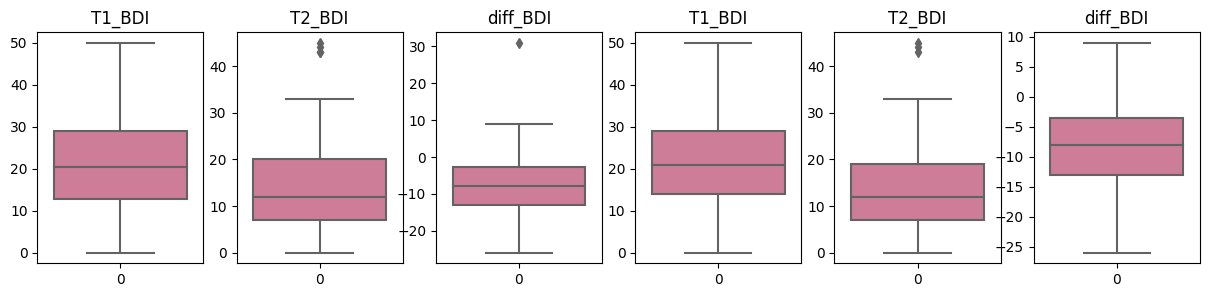

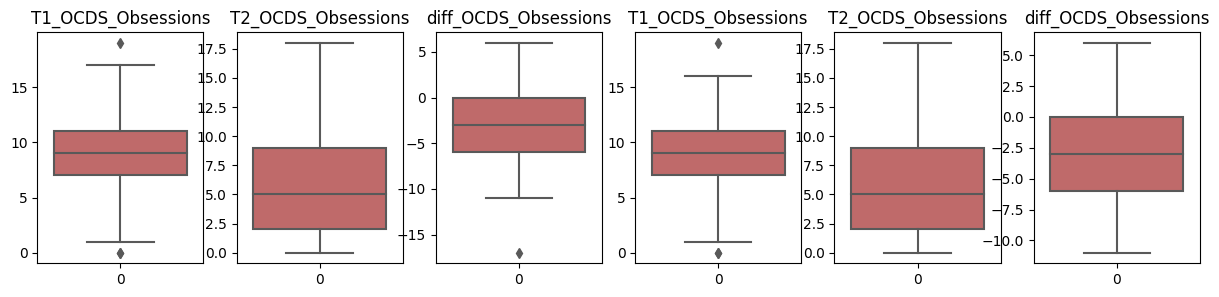

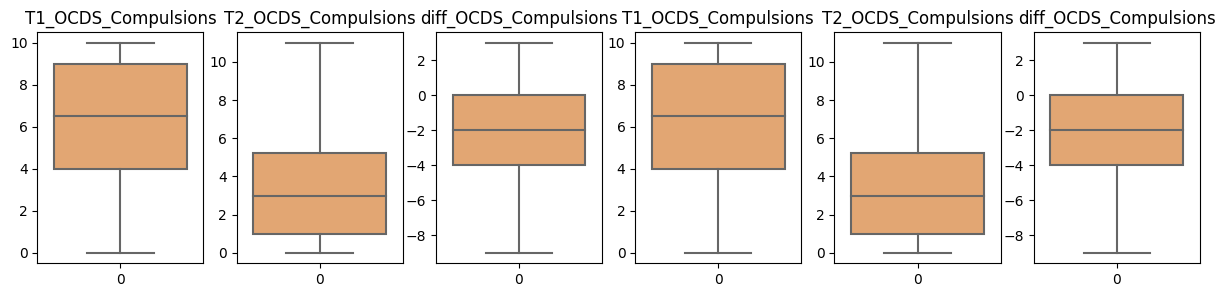

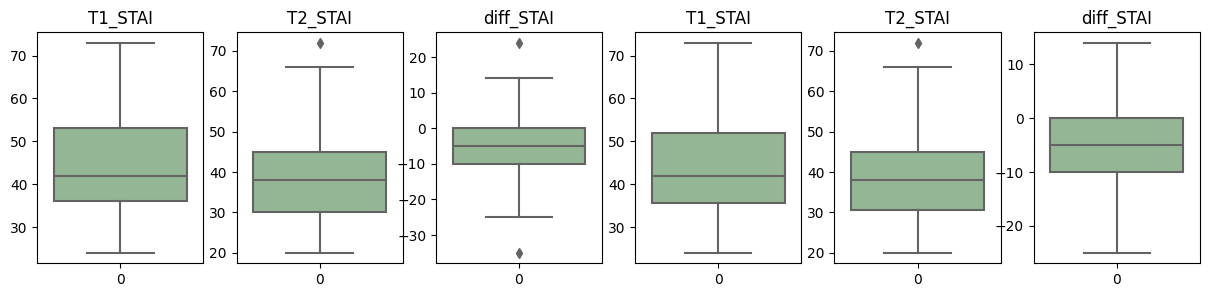

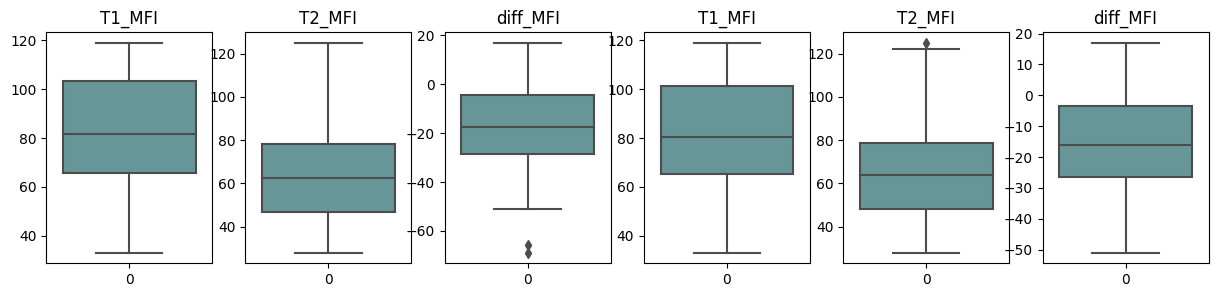

In [28]:
comportement =  ["BDI","OCDS_Obsessions","OCDS_Compulsions","STAI","MFI"]
#"BDI", "OCDS_MODIFIE_Total","OCDS_Obsessions","OCDS_Compulsions",
colors = [ "palevioletred","indianred","sandybrown","darkseagreen","cadetblue"]

for i in range(len(comportement)) :
    c= comportement[i]
    color = colors[i]
    df_c = (df_behav[["Numéro", "diff_"+c,"T1_"+c, "T2_"+c]]).copy().dropna(axis = 0)
    df_c.head(5)
    
    plt.figure(figsize=(15,3))
    plt.subplot(161)
    sns.boxplot(data=np.asarray(df_c["T1_"+c]), orient="v",color=color).set(title="T1_"+c)
    plt.subplot(162)
    sns.boxplot(data=np.asarray(df_c["T2_"+c]), orient="v",color=color).set(title="T2_"+c)
    plt.subplot(163)
    sns.boxplot(data=np.asarray(df_c["diff_"+c]), orient="v",color=color).set(title="diff_"+c)
       
    
    for sub in outliers[c]:
        df_c = df_c.drop(df_c[df_c["Numéro"]==sub].index)
    df_c.head(35)

    plt.subplot(164)
    sns.boxplot(data=np.asarray(df_c['T1_'+c]), orient="v",color=color).set(title='T1_'+c)
    plt.subplot(165)
    sns.boxplot(data=np.asarray(df_c['T2_'+c]), orient="v",color=color).set(title='T2_'+c)
    plt.subplot(166)
    sns.boxplot(data=np.asarray(df_c['diff_'+c]), orient="v",color=color).set(title='diff_'+c)
    
    plt.show()
    

In [29]:
def find_outliers_IQR(data, col, threshold=1.5):
    # Find first and third quartiles
    Q1, Q3 = np.percentile(data[col], [25, 75])
    # Compute IQR (interquartile range)
    IQR = Q3 - Q1
    # Compute lower and upper bound
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    # Select outliers
    print( col,Q1 , Q3)
    subjects = []
    down_outliers = np.asarray(data.loc[data[col]<lower_bound,"Numéro"])
    up_outliers = np.asarray(data.loc[data[col]>upper_bound,"Numéro"])
    
    for out in down_outliers:
        subjects.append(out)
    for out in up_outliers:
        subjects.append(out)
    return subjects

In [30]:
col_names = ["T1_BDI","T1_Total_OCDS","T1_OCDS_Obsessions","T1_OCDS_Compulsions","T1_STAI","T1_MFI","T2_BDI","T2_Total_OCDS","T2_OCDS_Obsessions","T2_OCDS_Compulsions","T2_STAI","T2_MFI"]

all_outliers = []
outliers_p_microstructure = {}

for col in col_names:
    data = datas_p[["Numéro",col]].dropna(axis=0)
    outliers = find_outliers_IQR(data,col,1.5)
    outliers_p_microstructure[col] = outliers
    all_outliers = all_outliers + outliers
    #print(name + region , outliers)
outliers = list(set(all_outliers))
print(all_outliers)
print(len(outliers),outliers)
outliers.sort()
for out in outliers : 
    nb = all_outliers.count(out)
    print(nb,out)
print(outliers_p_microstructure)  


T1_BDI 14.0 29.0
T1_Total_OCDS 10.0 19.0
T1_OCDS_Obsessions 6.5 11.0
T1_OCDS_Compulsions 4.0 9.0
T1_STAI 36.75 53.5
T1_MFI 67.5 103.5
T2_BDI 7.0 20.0
T2_Total_OCDS 4.0 13.0
T2_OCDS_Obsessions 2.0 9.0
T2_OCDS_Compulsions 1.0 5.25
T2_STAI 29.5 45.5
T2_MFI 45.5 79.25
['sub48', 'sub02', 'sub17', 'sub23', 'sub48', 'sub48', 'sub02', 'sub17']
4 ['sub23', 'sub48', 'sub02', 'sub17']
2 sub02
2 sub17
1 sub23
3 sub48
{'T1_BDI': [], 'T1_Total_OCDS': [], 'T1_OCDS_Obsessions': ['sub48'], 'T1_OCDS_Compulsions': [], 'T1_STAI': [], 'T1_MFI': [], 'T2_BDI': ['sub02', 'sub17', 'sub23', 'sub48'], 'T2_Total_OCDS': ['sub48'], 'T2_OCDS_Obsessions': [], 'T2_OCDS_Compulsions': [], 'T2_STAI': ['sub02', 'sub17'], 'T2_MFI': []}


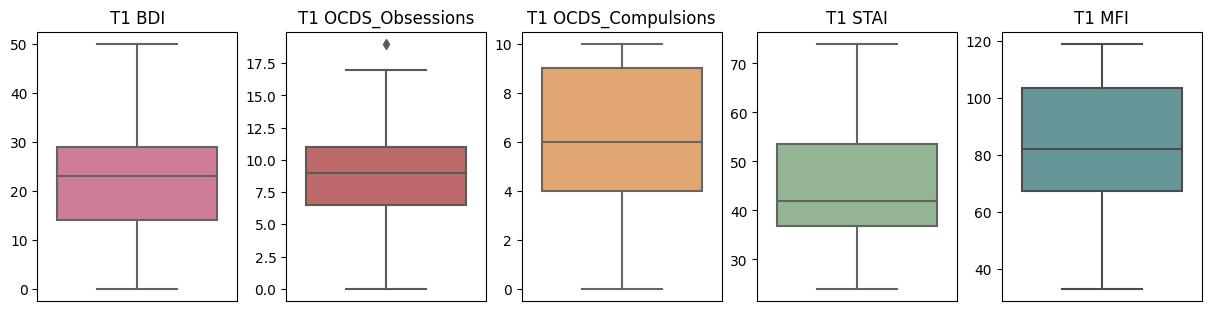

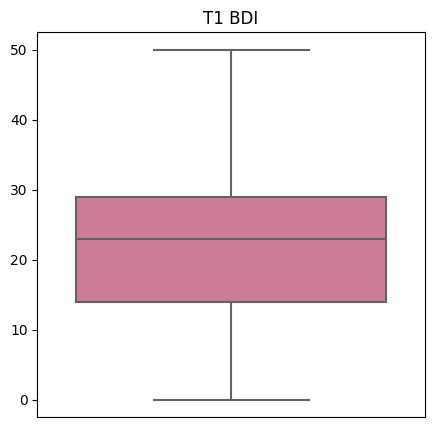

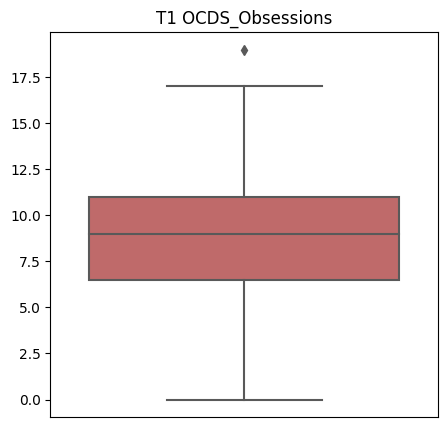

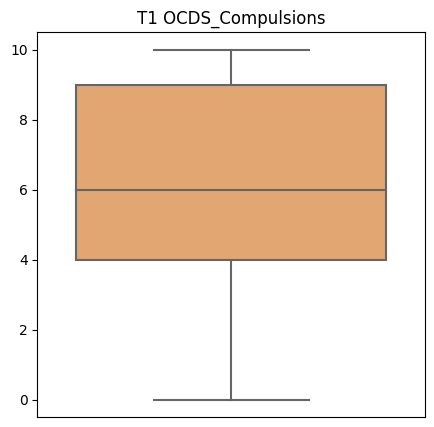

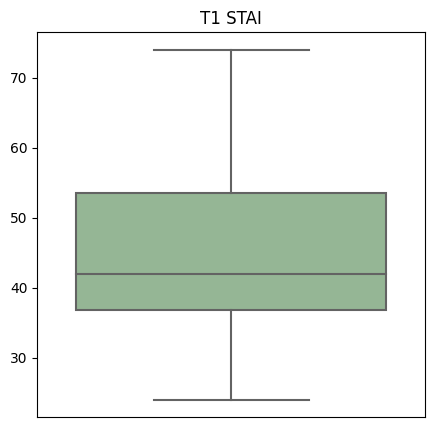

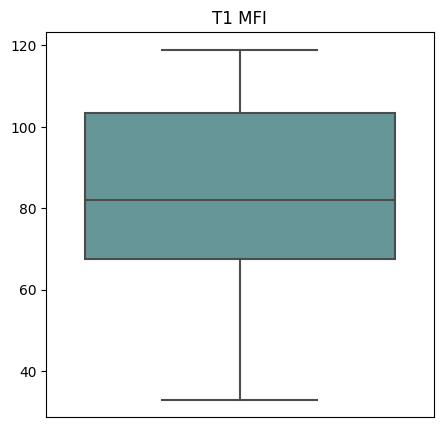

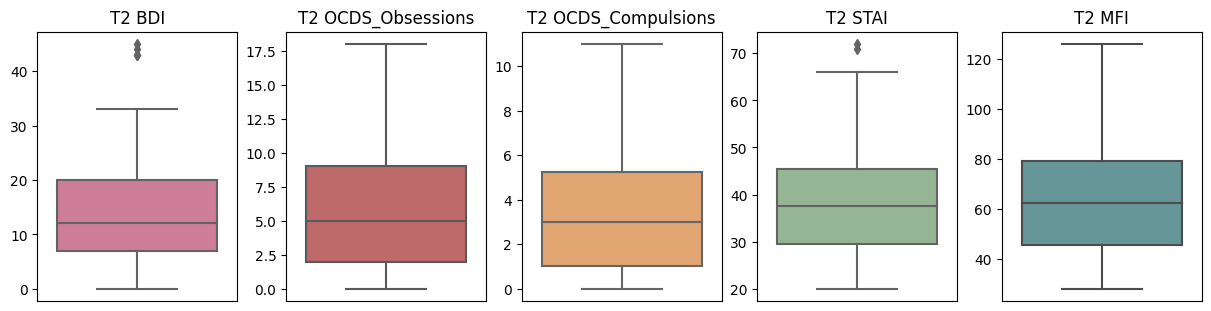

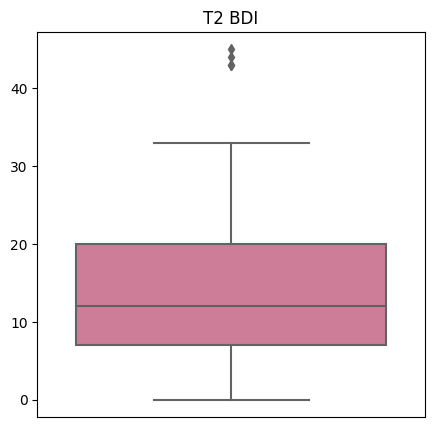

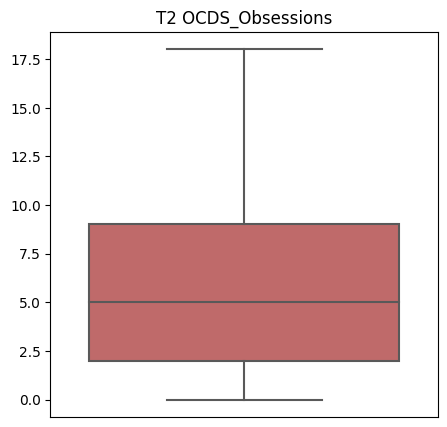

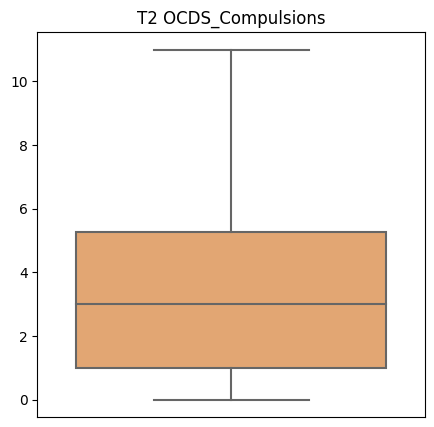

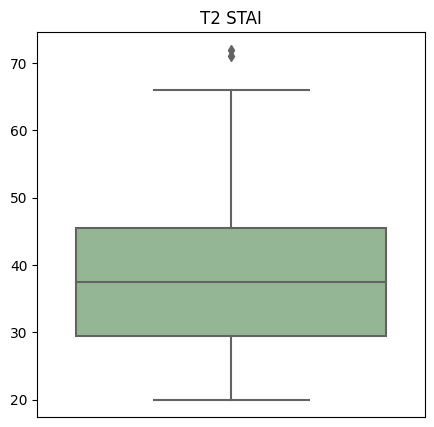

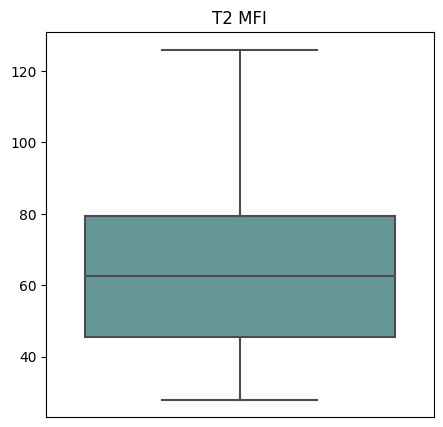

In [31]:
PATH_savefig = P_folder_path + "Data\Outliers\Patients"
warnings.filterwarnings('ignore')

comportement =  ["BDI","OCDS_Obsessions","OCDS_Compulsions","STAI","MFI"]
colors = [ "palevioletred","indianred","sandybrown","darkseagreen","cadetblue"]
#"BDI", "OCDS_MODIFIE_Total","OCDS_Obsessions","OCDS_Compulsions",
for t in ['T1', "T2"]:
    fig = plt.figure(figsize=(12,3),constrained_layout = True)
    #plt.tight_layout(h_pad=6)
    value = 151
    for i in range(len(comportement)) :
        c= comportement[i]
        color = colors[i]

        plt.subplot(value)
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        sns.boxplot(data=np.asarray(df_behav[t +"_"+c]), orient = "v", color=color).set(title= t +" " +c)
        #plt.savefig(PATH_savefig + "\Boxplot_" + c + "_evolution.png")
        value = value +1
    #fig.suptitle('Boxplot of ')
    plt.savefig(PATH_savefig + "\Boxplot_comportement_outliers"+t+".png")
    plt.show()

    for i in range(len(comportement)) :
        c= comportement[i]
        color = colors[i]
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        sns.boxplot(data=np.asarray(df_behav[t +"_"+c]), orient = 'v', color=color).set(title=t +" "+c)
        plt.savefig(PATH_savefig + "\Boxplot_"+t +"_"+c+"_outliers.png")
        plt.show()